In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
nyc = pd.read_csv("data/1minute_data_newyork.csv")

In [5]:
metadata = pd.read_csv("data/metadata.csv")
metadata = metadata[1:]
len(metadata)

1969

In [7]:
def perc_txt_parse(pc):
    pc = str(pc)
    if len(pc.split("nan")) >= 2:
        return 0
    else:
        return eval(pc.split("%")[0]) * 0.01
perc_txt_parse("nan")

0

## Preprocessing
Select records with >80% `eGauge_1min_data_availability`

In [12]:
metadata_sel = metadata[
metadata["egauge_1min_data_availability"].apply(
    lambda x: perc_txt_parse(x) > 0.8
)]

In [14]:
metadata_sel['dataid'] = metadata_sel['dataid'].astype('int64');
metadata_sel['dataid'].dtype

C:\Users\liche\AppData\Local\Temp\ipykernel_40352\2104478508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_sel['dataid'] = metadata_sel['dataid'].astype('int64');


dtype('int64')

In [16]:
nyc_sel = nyc[nyc['dataid'].isin(metadata_sel['dataid'])];

In [17]:
len(nyc_sel)

6359040

In [20]:
len(nyc)

6624000

In [24]:
nyc_5997 = nyc[nyc['dataid'] == 5997]

In [36]:
for c in nyc_5997.columns:
    print(c, end=', ')

dataid, localminute, air1, air2, air3, airwindowunit1, aquarium1, bathroom1, bathroom2, bedroom1, bedroom2, bedroom3, bedroom4, bedroom5, battery1, car1, car2, circpump1, clotheswasher1, clotheswasher_dryg1, diningroom1, diningroom2, dishwasher1, disposal1, drye1, dryg1, freezer1, furnace1, furnace2, garage1, garage2, grid, heater1, heater2, heater3, housefan1, icemaker1, jacuzzi1, kitchen1, kitchen2, kitchenapp1, kitchenapp2, lights_plugs1, lights_plugs2, lights_plugs3, lights_plugs4, lights_plugs5, lights_plugs6, livingroom1, livingroom2, microwave1, office1, outsidelights_plugs1, outsidelights_plugs2, oven1, oven2, pool1, pool2, poollight1, poolpump1, pump1, range1, refrigerator1, refrigerator2, security1, sewerpump1, shed1, solar, solar2, sprinkler1, sumppump1, utilityroom1, venthood1, waterheater1, waterheater2, wellpump1, winecooler1, leg1v, leg2v, 

In [46]:
for c in nyc_5997.columns:
    print(c + ': ' + str(nyc_5997.iloc[0][c]), end=',  ')

dataid: 5997,  localminute: 2019-06-24 15:55:00-05,  air1: nan,  air2: nan,  air3: nan,  airwindowunit1: nan,  aquarium1: nan,  bathroom1: 0.001,  bathroom2: nan,  bedroom1: nan,  bedroom2: nan,  bedroom3: nan,  bedroom4: nan,  bedroom5: nan,  battery1: nan,  car1: nan,  car2: nan,  circpump1: nan,  clotheswasher1: 0.0,  clotheswasher_dryg1: nan,  diningroom1: nan,  diningroom2: nan,  dishwasher1: 0.0,  disposal1: nan,  drye1: 0.0,  dryg1: nan,  freezer1: nan,  furnace1: nan,  furnace2: nan,  garage1: 0.003,  garage2: nan,  grid: -1.036,  heater1: nan,  heater2: nan,  heater3: nan,  housefan1: nan,  icemaker1: nan,  jacuzzi1: nan,  kitchen1: nan,  kitchen2: nan,  kitchenapp1: 0.002,  kitchenapp2: nan,  lights_plugs1: 0.011,  lights_plugs2: nan,  lights_plugs3: nan,  lights_plugs4: nan,  lights_plugs5: nan,  lights_plugs6: nan,  livingroom1: nan,  livingroom2: nan,  microwave1: 0.001,  office1: nan,  outsidelights_plugs1: nan,  outsidelights_plugs2: nan,  oven1: nan,  oven2: nan,  pool1

In [58]:
for c in metadata_sel.columns:
    print(c, end=', ')

dataid, active_record, building_type, city, state, egauge_1min_min_time, egauge_1min_max_time, egauge_1min_data_availability, egauge_1s_min_time, egauge_1s_max_time, egauge_1s_data_availability, air1, air2, air3, airwindowunit1, aquarium1, bathroom1, bathroom2, bedroom1, bedroom2, bedroom3, bedroom4, bedroom5, battery1, car1, car2, circpump1, clotheswasher1, clotheswasher_dryg1, diningroom1, diningroom2, dishwasher1, disposal1, drye1, dryg1, freezer1, furnace1, furnace2, garage1, garage2, grid, heater1, heater2, heater3, housefan1, icemaker1, jacuzzi1, kitchen1, kitchen2, kitchenapp1, kitchenapp2, lights_plugs1, lights_plugs2, lights_plugs3, lights_plugs4, lights_plugs5, lights_plugs6, livingroom1, livingroom2, microwave1, office1, outsidelights_plugs1, outsidelights_plugs2, oven1, oven2, pool1, pool2, poollight1, poolpump1, pump1, range1, refrigerator1, refrigerator2, security1, sewerpump1, shed1, solar, solar2, sprinkler1, sumppump1, utilityroom1, venthood1, waterheater1, waterheater

In [69]:
metadata_sel[metadata_sel['dataid'] == 5997]['lights_plugs1']

1787    yes
Name: lights_plugs1, dtype: object

(array([8.6000e+01, 2.3500e+02, 3.1700e+02, 5.9100e+02, 9.0100e+02,
        1.2980e+03, 2.0950e+03, 2.6100e+03, 2.9890e+03, 3.3430e+03,
        3.4680e+03, 3.6370e+03, 3.5370e+03, 3.0760e+03, 2.8120e+03,
        2.4190e+03, 2.1840e+03, 1.9300e+03, 1.6170e+03, 1.5140e+03,
        1.3870e+03, 1.3490e+03, 1.4030e+03, 1.3370e+03, 1.1960e+03,
        1.2500e+03, 1.2020e+03, 1.1930e+03, 1.1730e+03, 1.1850e+03,
        1.1650e+03, 1.1970e+03, 1.3030e+03, 1.4170e+03, 1.4330e+03,
        1.5160e+03, 1.7060e+03, 1.7200e+03, 1.8180e+03, 2.1240e+03,
        2.1890e+03, 2.4210e+03, 2.4540e+03, 2.5580e+03, 2.9920e+03,
        3.6300e+03, 4.4270e+03, 5.9180e+03, 2.3927e+04, 2.5337e+04,
        1.4950e+04, 3.2575e+04, 2.9434e+04, 1.0981e+04, 9.7630e+03,
        5.9670e+03, 2.6320e+03, 1.5040e+03, 1.4810e+03, 1.1710e+03,
        1.1940e+03, 1.1970e+03, 9.0000e+02, 9.9900e+02, 8.8900e+02,
        7.8900e+02, 5.6500e+02, 2.8000e+02, 2.5700e+02, 2.5000e+02,
        1.9900e+02, 1.8600e+02, 1.8400e+02, 1.86

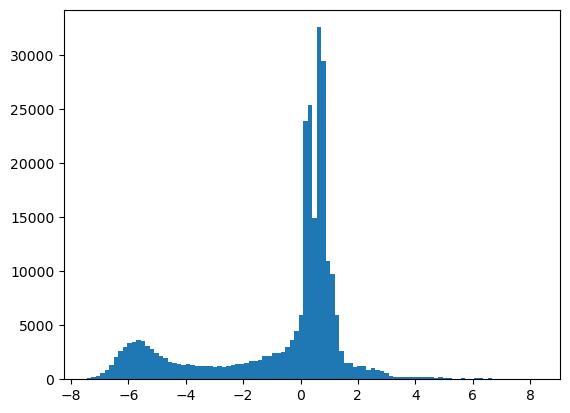

In [129]:
plt.hist(nyc_5997['grid'], bins=100)

In [109]:
nyc_5997['lights_plugs1']

0          0.011
52         0.012
53         0.012
54         0.011
55         0.011
           ...  
6623543    0.051
6623544    0.057
6623545    0.059
6623546    0.054
6623547    0.055
Name: lights_plugs1, Length: 264960, dtype: float64

In [60]:
nyc_5997.columns.isin(metadata_sel.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])

In [399]:
appliances = nyc_5997.columns[nyc_5997.columns.isin(metadata_sel.columns)]
appliances = list(appliances)
removable = [
    "dataid",
    "grid",
    "solar",
    "solar2"
]
for c in removable:
    appliances.remove(c)
pd.DataFrame(data={'key': appliances}).to_csv('appliances.csv')
appliances = list(pd.read_csv('appliances.csv')['key']) # list of all consumers

In [401]:
class Residence:
    def __init__(self, _id, all_meterage, all_metadata, _appliances=list(pd.read_csv('appliances.csv')['key'])):
        self.meterage = all_meterage[all_meterage['dataid'] == _id]
        self.metadata = all_metadata[all_metadata['dataid'] == _id]
        self.dataid = _id
        self.possible_appliances = _appliances
        exapp = []
        for app in _appliances:
            if self.metadata[app].iloc[0] == 'yes':
                exapp.append(app)
        self.existing_appliances = exapp
        self.meterage['localminute'] = pd.to_datetime(self.meterage['localminute'], format='%Y-%m-%d %H:%M:%S-05')
        self.meterage.sort_values('localminute', inplace=True)
        self.meterage.reset_index(inplace=True)
        


    def parse_datetime(t): # backup func
        return pd.to_datetime(":".join(t.split(":")[:2]), format='%Y-%m-%d %H:%M')
        
        
r5997 = Residence(5997, nyc_5997, metadata_sel)
r5997.existing_appliances

['bathroom1',
 'clotheswasher1',
 'dishwasher1',
 'drye1',
 'garage1',
 'kitchenapp1',
 'lights_plugs1',
 'microwave1',
 'utilityroom1',
 'waterheater1']

<Axes: >

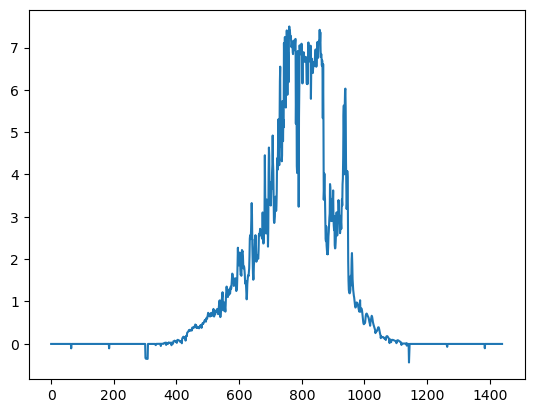

In [403]:
r5997.meterage['solar'].iloc[:1440].plot()

In [411]:
def parse_load_profiles(p):
    import math
    n = int(math.floor(p.shape[0] / 1440))
    return p[:n*1440].reshape(n, 1440)
def pcp(stoch_profiles, stoch_profiles_avg):
    plt.figure(figsize=(10, 5))
    for n in stoch_profiles:
        plt.plot(np.arange(n.shape[0]), n, "#b0c4de")
        plt.xlabel("Time (hours)")
        plt.ylabel("Power (W)")
        
        #plt.ylim(ymin=0)
        # plt.ylim(ymax=5000)
        plt.margins(x=0)
        plt.margins(y=0)
    plt.plot(np.arange(n.shape[0]), stoch_profiles_avg, "#4169e1")
    plt.xticks(
        [0, 240, 480, (60 * 12), (60 * 16), (60 * 20), (60 * 24)],
        [0, 4, 8, 12, 16, 20, 24],
    )
    # plt.savefig('profiles.eps', format='eps', dpi=1000)
    plt.show()


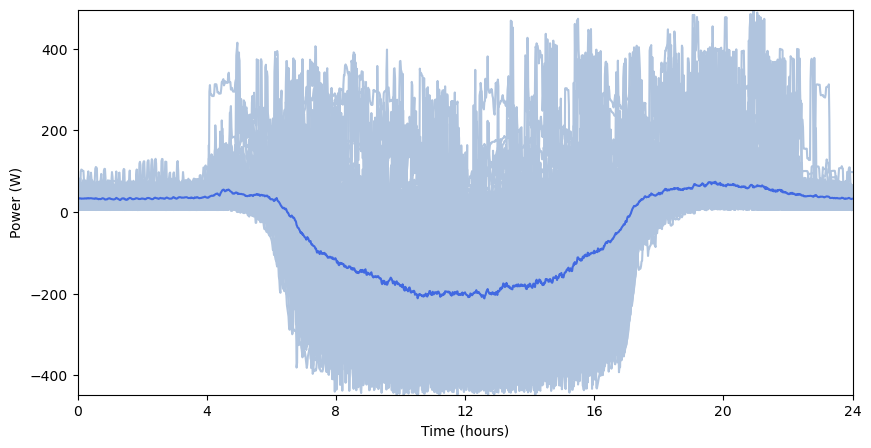

In [415]:
a = parse_load_profiles(np.array(r5997.meterage['grid'][:]))
pcp(a*60, (a*60).mean(axis=0))

In [253]:
def parse_datetime(t):
    return pd.to_datetime(":".join(t.split(":")[:2]),
               format='%Y-%m-%d %H:%M')
r5997.meterage['localminute'].apply(lambda x: parse_datetime(x))


0         2019-06-24 15:55:00
52        2019-06-24 15:59:00
53        2019-06-24 15:58:00
54        2019-06-24 15:57:00
55        2019-06-24 15:56:00
                  ...        
6623543   2019-10-31 23:04:00
6623544   2019-10-31 23:03:00
6623545   2019-10-31 23:02:00
6623546   2019-10-31 23:01:00
6623547   2019-10-31 23:00:00
Name: localminute, Length: 264960, dtype: datetime64[ns]

In [259]:
pd.to_datetime(r5997.meterage['localminute'], format='%Y-%m-%d %H:%M:%S-05')

0         2019-06-24 15:55:00
52        2019-06-24 15:59:00
53        2019-06-24 15:58:00
54        2019-06-24 15:57:00
55        2019-06-24 15:56:00
                  ...        
6623543   2019-10-31 23:04:00
6623544   2019-10-31 23:03:00
6623545   2019-10-31 23:02:00
6623546   2019-10-31 23:01:00
6623547   2019-10-31 23:00:00
Name: localminute, Length: 264960, dtype: datetime64[ns]

Timestamp('2019-06-24 15:55:00')

<Axes: >

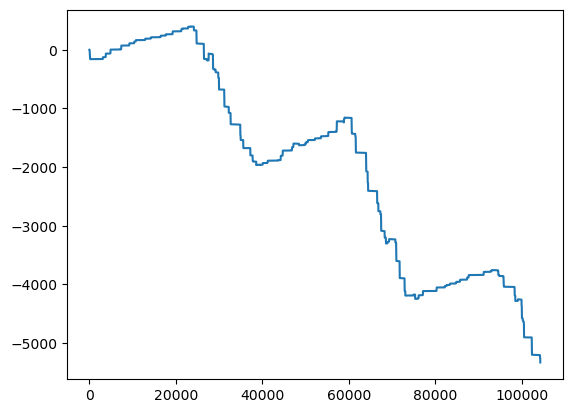

In [56]:
nyc_5997.iloc[0:60*72].grid.cumsum().plot()

In [ ]:
#metadata_sel = metadata[metadata["active_record"] == "yes"]
#len(metadata_sel)

In [29]:
metadata_sel = metadata[metadata["active_record"] == "yes"]
len(metadata_sel)

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,...,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines,energy_storage_system,energy_storage_system_l1,energy_storage_system_l2
35,5180,yes,Single-Family Home 001 (Master),Portland,Oregon,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,800,yes,Single-Family Home 001 (Master),Portland,Oregon,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,952,yes,Single-Family Home 001 (Master),Portland,Oregon,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,114,yes,Single-Family Home 001 (Master),Austin,Texas,2013-10-15 19:00:00-05:00,2019-11-10 08:59:00-06:00,99%,2019-02-22 06:00:00-06:00,2019-11-10 08:00:00-06:00,...,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,NaN,NaN,NaN,NaN
51,370,yes,Single-Family Home 001 (Master),Austin,Texas,2012-07-11 00:00:00-05:00,2022-10-03 04:59:00-05:00,85%,2019-03-02 01:00:00-06:00,2022-10-03 02:00:00-05:00,...,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,1281,yes,Single-Family Home 001 (Master),Berwick,Pennsylvania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,8576,yes,Single-Family Home 001 (Master),Berwick,Pennsylvania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,11300,yes,Single-Family Home 001 (Master),Berwick,Pennsylvania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,4046,yes,Single-Family Home 001 (Master),Culebra,Puerto Rico,2023-06-02 19:00:00-05:00,2024-02-08 07:59:00-06:00,100%,2023-06-02 19:00:00-05:00,2023-10-31 23:00:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
